In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import tensorflow as tf
import pickle

In [2]:
def load_rottenvsfresh():
    quality=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('train')):
        if quality[0] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        elif quality[3] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,3])
        elif quality[4] in cata:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,4])
        else:
            path_main=os.path.join('train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,5])
    print('Shuffling data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [3]:
X,Y=load_rottenvsfresh()

100%|███████████████████████████████████████████████████████████████████████| 10901/10901 [00:00<00:00, 1093176.52it/s]

Shuffling data.....


In [4]:
from collections import Counter
Y=np.array(Y)
X=np.array(X)
newData = Counter(Y)
most_fruits = newData.most_common(6)
most_fruits

[(3, 2342), (4, 2224), (0, 1693), (5, 1595), (1, 1581), (2, 1466)]

In [5]:
X.shape

(10901, 100, 100, 3)

In [6]:
def load_rottenvsfresh_test_valset():
    quality=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('test')):
        if quality[0] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        elif quality[3] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,3])
        elif quality[4] in cata:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,4])
        else:
            path_main=os.path.join('test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,5])
    print('Shuffling data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [7]:
X_val,Y_val=load_rottenvsfresh_test_valset()

100%|██████████████████████████████████████████████████████████████████████████| 2698/2698 [00:00<00:00, 900615.38it/s]

Shuffling data.....


In [8]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
newData = Counter(Y_val)
most_fruits = newData.most_common(6)
most_fruits

[(3, 601), (4, 530), (5, 403), (0, 395), (2, 388), (1, 381)]

In [9]:
X=X/255.0
X_val=X_val/255.0

In [10]:
Y=to_categorical(Y)
Y_val=to_categorical(Y_val)

In [11]:
Y.shape, Y_val.shape

((10901, 6), (2698, 6))

In [12]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(SeparableConv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
separable_conv2d (SeparableC (None, 100, 100, 64)      2400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 50, 50, 128)       8896      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 128)       5

In [14]:
lr_rate=keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=6, verbose=1, mode='max',
    min_lr=0.00002, cooldown=2)
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='fruit_v2.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(lr = 0.001), metrics=['accuracy'])

In [16]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 30,
                 callbacks=[check_point])

Epoch 1/30
546/546 [==============================] - 538s 961ms/step - loss: 1.4558 - accuracy: 0.6687 - val_loss: 0.5421 - val_accuracy: 0.7910

Epoch 00001: val_loss improved from inf to 0.54208, saving model to fruit_v2.h5
Epoch 2/30
546/546 [==============================] - 494s 904ms/step - loss: 0.3780 - accuracy: 0.8705 - val_loss: 0.3969 - val_accuracy: 0.8636

Epoch 00002: val_loss improved from 0.54208 to 0.39688, saving model to fruit_v2.h5
Epoch 3/30
546/546 [==============================] - 480s 880ms/step - loss: 0.3460 - accuracy: 0.8844 - val_loss: 0.2754 - val_accuracy: 0.9177

Epoch 00003: val_loss improved from 0.39688 to 0.27542, saving model to fruit_v2.h5
Epoch 4/30
546/546 [==============================] - 477s 874ms/step - loss: 0.2374 - accuracy: 0.9213 - val_loss: 0.1251 - val_accuracy: 0.9518

Epoch 00004: val_loss improved from 0.27542 to 0.12514, saving model to fruit_v2.h5
Epoch 5/30
546/546 [==============================] - 481s 882ms/step - loss: 0.

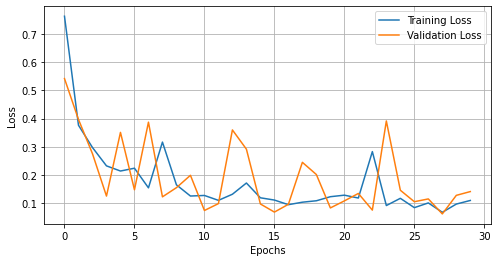

In [17]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

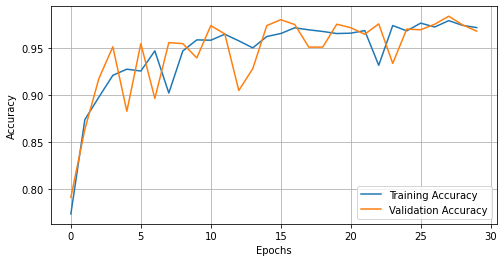

In [18]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [19]:
model.evaluate(X_val,Y_val)

85/85 [==============================] - 21s 252ms/step - loss: 0.1411 - accuracy: 0.9685


[0.14107176661491394, 0.9684951901435852]

In [20]:
model.save('fruit_classification_v2.h5')

In [21]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical 
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [22]:
from keras import models
model = models.load_model('fruit_v2.h5')

In [23]:
model.evaluate(X_val,Y_val)

85/85 [==============================] - 25s 261ms/step - loss: 0.0618 - accuracy: 0.9844


[0.06180496886372566, 0.9844329357147217]

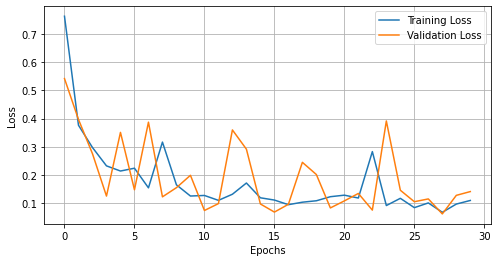

In [24]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

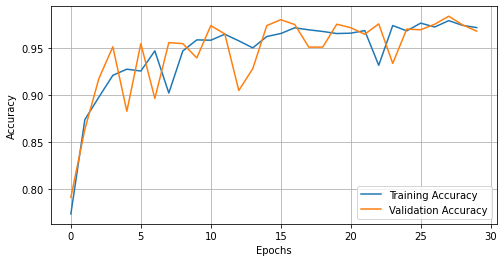

In [25]:
plt.figure(1, figsize = (8, 4))
plt.plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()